<a href="https://colab.research.google.com/github/fabiorolim/dados_meteorologicos_oeiras/blob/master/An%C3%A1lise_meteorol%C3%B3gioca_oeiras_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/fabiorolim/dados_meteorologicos_oeiras/blob/master/ICON%20APP%20tempo%20IFPI%20Oeiras.png?raw=true" height="80px" width="80px">

# Análise dos dados meteorológicos de 2021 em Oeiras, Piauí.







<img src="https://github.com/fabiorolim/dados_meteorologicos_oeiras/blob/master/daves.jpg?raw=true" height="220px" width="420px">

Este artigo apresenta uma análise dos dados meteorológicos do ano de 2020, da cidade de Oeiras - PI, coletados apartir da estação meteorologica [Daves Vantage Pro 2](https://www.davisinstruments.com/solution/vantage-pro2/), instalada no Instituto Federal do Piauí, Campus Oeiras.

Um raspiberry pi conectado ao console da estação envia os dados da primeira leitura do dia para o sistema online, às 00h:05m, as demais leituras são realizadas a cada 30 minutos, exceto a última do dia às 23h:59m.

Todos os dados utilizados neste notebook podem ser acessados através do [sistema Cruviana](https://cruviana.ifpi.edu.br/oeiras/).

## A cidade
<img src="https://github.com/fabiorolim/dados_meteorologicos_oeiras/blob/master/IMG_6955.jpg?raw=true" height="220px" width="420px">

Oeiras é um município brasileiro do estado do Piauí, localizado na latitude 07º01'30" sul e longitude 42º07'51" oeste. A cidade possui 2.720km² de extensão territórial e está situada bem ao centro do estado.

O clima tropical semiárido é predominante na região do municipio piauiense, onde nos meses mais quentes, as temperaturas chegam a ultrapassar os 40⁰C.

O Rio Canindé, que corta a primeira capital do estado, é temporario, seu volume de águas está mais elevado na época das chuvas, que se concentram em torno de 4 meses do ano.



## Obtenção dos dados

Os dados analisados foram obtidos por meio de download no  [sistema Cruviana](https://cruviana.ifpi.edu.br/oeiras/). Para baixar o arquivo em formato cvs é necessário informar o intervalo de datas desejado. A data inicial informada no sistema foi 01/01/2020 e a data final foi 31/12/2020. Após download, o arquivo baixado foi anexado ao repositório no [github](https://https://raw.githubusercontent.com/fabiorolim/dados_meteorologicos_oeiras/master/dados_2020.csv) para importação neste notebook.





### Importando os dados



In [1]:
# Importandos bibiotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Cria dataframe com o csv através do pandas
url = 'https://raw.githubusercontent.com/fabiorolim/dados_meteorologicos_oeiras/master/dados_2021_setembro.csv'
 
df = pd.read_csv(url, parse_dates=True, index_col='Datetime')

In [2]:
!pip install sweetviz
import sweetviz as sv


     |████████████████████████████████| 15.1 MB 190 kB/s 


In [ ]:
report = sv.analyze(df)
display(report.show_html())


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


None

## Informações acerca do banco de dados

A base de dados é composta por 16.256 linhas ou registros, cada um corresponde a uma leitura feita pela estação, e 23 colunas ou variáveis.

In [3]:
# Obtem informações sobre os dados
print('Informação sobre a base dados')
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}')

Informação sobre a base dados
Número de linhas: 12092
Número de colunas: 23


In [4]:
# Exibe 5 entradas do banco de dados
df.head()

,id,Data,Data_add,BarTrend,Barometer,TempOut,WindSpeed,WindSpeed10Min,WindDir,HumOut,RainRate,SolarRad,RainDay,RainMonth,RainYear,ETDay,ETMonth,ETYear,RainStorm,HeatIndex,WindChill,THSWIndex,Station
Datetime,,,,,,,,,,,,,,,,,,,,,,,
2021-01-12 08:35:03.563645,30171,2021-01-12,2021-01-12,20.0,29.833,26.2,0,0,353,87.0,NaN,153.0,0.0,30.0,30.0,0.1,40.9,40.9,NaN,29.4,26.1,30.6,1
2021-01-14 10:05:03.588056,30266,2021-01-14,2021-01-14,0.0,29.820,26.4,0,0,68,82.0,NaN,341.0,0.4,78.2,78.2,0.4,43.4,43.4,NaN,29.4,26.7,33.9,1
2021-01-19 11:35:04.085157,30511,2021-01-19,2021-01-19,236.0,29.780,31.4,8,1,249,61.0,NaN,573.0,1.2,91.4,91.4,1.6,62.7,62.7,NaN,36.1,31.7,43.3,1
2021-01-20 16:35:03.592622,30569,2021-01-20,2021-01-20,0.0,29.734,24.9,0,0,231,85.0,NaN,30.0,1.6,93.0,93.0,2.5,66.8,66.8,NaN,27.2,25.0,26.7,1
2021-02-03 04:05:03.557765,31213,2021-02-03,2021-02-03,0.0,29.768,20.4,0,0,318,89.0,NaN,0.0,0.0,0.2,112.8,0.1,8.4,114.3,NaN,21.7,20.6,21.1,1


### Dicionário de dados


*   **Datetime**: Tempo preciso em que a leitura ocorreu em formato americano;
*   **id:** Identificador único da leitura;
*   **Data_add:** Data em que a leitura ocorreu em formato americano;
*   **BarTrend:** Tendência da pressão para 3h;
*   **Barometer:** Pressão barométrica;
*   **TempOut:** Temperatura do ar em grau em (⁰C);
*   **WindSpeed:** Velocidade do vento em (km/h);
*   **WindSpeed10Min:** Média de velocidade do vento nos últimos 10 minutos em (km/h);
*   **WindDir:** Direção do vento em (⁰);
*   **HumOut:** Umidade relativa do ar em (%);
*   **RainRate:** Volume de chuva por hora (mm);
*   **SolarRad:** Radiação solar em (W/m²);
*   **RainDay:** Volume de chuva acumulado no dia em (mm);
*   **RainMonth:** Volume de chuva acumulado no Mês em (mm);
*   **RainYear:** Volume de chuva acumulado no ano em (mm);
*   **ETDay:** Volume de evapotranspiração acumulado no dia em (mm);
*   **ETMonth:** Volume de evapotranspiração acumulado no mês em (mm);
*   **ETYear:** Volume de evapotranspiração acumulado no ano em (mm);
*   **RainStorm:** Volume de chuva considerada tempestade (mm);
*   **HeatIndex:** Índice de calor em (⁰C);
*   **WindChill:** Sensação térmica considerando vento (⁰C);
*   **THSWIndex:** Sensação térmica considerando umidade, radiação solar, vento e temperatura;
*   **Station:** Identificador da estação meteorológica.

## Removendo dados

Antes da etapada de exploração dos dados, buscou-se por variáveis com valores nulos ou que não serão utilizadas para a análise.



In [5]:
# Exibe todas as variáveis e o percentual de valores nulos 
print(f'{(df.isnull().sum()/df.shape[0])*100}')

id                  0.0
Data                0.0
Data_add            0.0
BarTrend            0.0
Barometer           0.0
TempOut             0.0
WindSpeed           0.0
WindSpeed10Min      0.0
WindDir             0.0
HumOut              0.0
RainRate          100.0
SolarRad            0.0
RainDay             0.0
RainMonth           0.0
RainYear            0.0
ETDay               0.0
ETMonth             0.0
ETYear              0.0
RainStorm         100.0
HeatIndex           0.0
WindChill           0.0
THSWIndex           0.0
Station             0.0
dtype: float64


In [6]:
# Cria uma cópia do dataframe original
df_clean = df.copy()
# Remove todas as variáveis com dados nulos e que não serão utilizadas na análise. 
df_clean = df_clean.drop(columns=['id', 'RainRate', 'RainStorm', 'BarTrend', 'Barometer', 'WindSpeed10Min', 'Station', 'HeatIndex', 'WindChill', 'THSWIndex'])
display(df_clean.head())

,Data,Data_add,TempOut,WindSpeed,WindDir,HumOut,SolarRad,RainDay,RainMonth,RainYear,ETDay,ETMonth,ETYear
Datetime,,,,,,,,,,,,,
2021-01-12 08:35:03.563645,2021-01-12,2021-01-12,26.2,0,353,87.0,153.0,0.0,30.0,30.0,0.1,40.9,40.9
2021-01-14 10:05:03.588056,2021-01-14,2021-01-14,26.4,0,68,82.0,341.0,0.4,78.2,78.2,0.4,43.4,43.4
2021-01-19 11:35:04.085157,2021-01-19,2021-01-19,31.4,8,249,61.0,573.0,1.2,91.4,91.4,1.6,62.7,62.7
2021-01-20 16:35:03.592622,2021-01-20,2021-01-20,24.9,0,231,85.0,30.0,1.6,93.0,93.0,2.5,66.8,66.8
2021-02-03 04:05:03.557765,2021-02-03,2021-02-03,20.4,0,318,89.0,0.0,0.0,0.2,112.8,0.1,8.4,114.3


## Distribuição das variáveis

A verificação da distribuição dos dados permite detectar anomalias e outliers que podem comprometer a análise. 

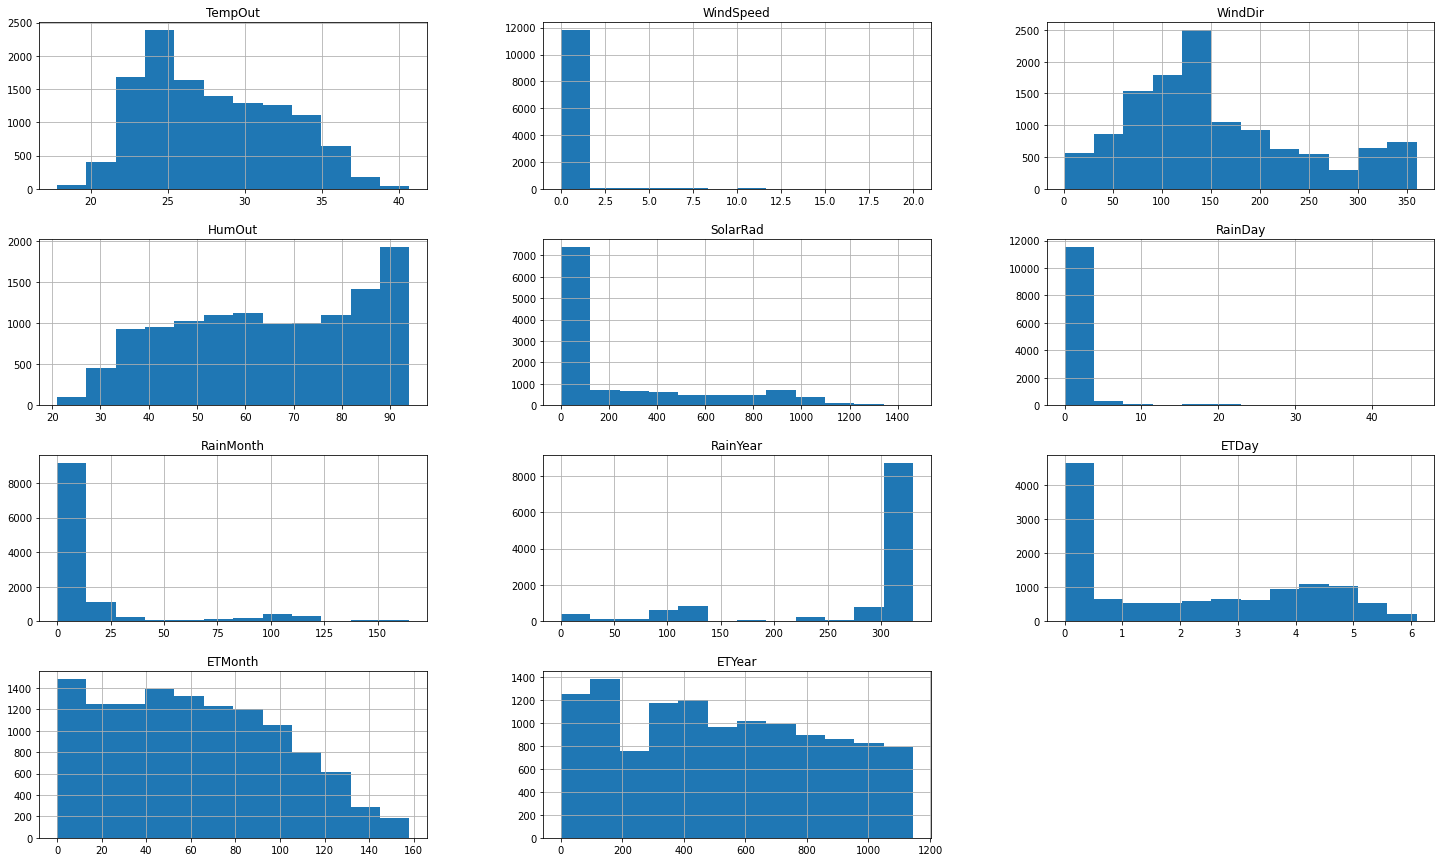

In [7]:
# Cria histogramas com as variáveis do modelo
df_clean.hist(figsize=(25, 15), bins=12);

## Análise da temperatura

In [8]:
# Exibe informações estatisticas acerca da temperatura do ar
df_clean.TempOut.describe()

count    12092.000000
mean        27.913645
std          4.416461
min         17.800000
25%         24.200000
50%         27.200000
75%         31.400000
max         40.700000
Name: TempOut, dtype: float64

Como visto acima, a média de temperatura anual da cidade de Oeiras, em 2021 foi de aproximadamente 27,9⁰C. O desvio padrão foi de aproximadamente 4,4 ⁰C. A menor temperatura registrada foi de 17,8⁰C, equanto a maior foi 40,7⁰C. 
Através do gráfico abaixo, pode-se visualizar a amplitude dos valores da temperatura, a mediana e os valores predominantes.

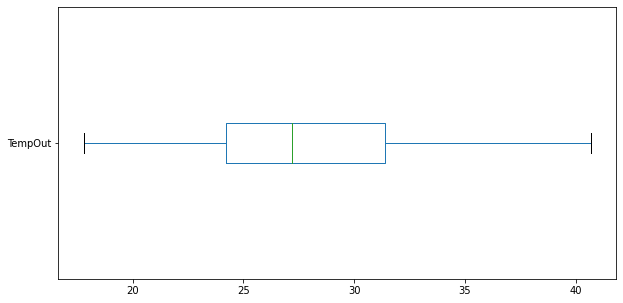

In [9]:
#Boxplot para TempOut
df_clean.TempOut.plot(kind='box', vert=False, figsize=(10, 5))
plt.show()

### Qual dia do ano registrou a temperatura mais alta ?


In [10]:
# Retorna o Datetime correspoendete ao maior valor de TempOut
df_clean.loc[df_clean.TempOut == df_clean.TempOut.max(), ['TempOut']]


,TempOut
Datetime,
2021-09-22 15:05:04.925879,40.7


A maior temperatura do ano foi registrada no dia 04 de outubro às 16:05m.

### Qual dia do ano registrou a temperatura mais baixa ?

In [11]:
# Retorna o Datetime correspoendete ao menor valor de TempOut
df_clean.loc[df_clean.TempOut == df_clean.TempOut.min(), ['TempOut']]

,TempOut
Datetime,
2021-05-27 06:05:03.345435,17.8


A menor temperatura do ano foi registrada no dia 27 de maio às 05h:35m.

### Qual foi o dia com a maior média de temperatura ?

In [12]:
dias_media_temperatura = df_clean.groupby(['Data_add']).TempOut.mean().sort_values()
display(dias_media_temperatura[-1:])

Data_add
2021-09-11    32.833333
Name: TempOut, dtype: float64

O dia 11/09 registrou a maior média de temperatura com aproximadamente 32,8 ⁰C.

### Qual foi o dia com a menor média de temperatura?

In [13]:
display(dias_media_temperatura[:1])

Data_add
2021-04-19    23.213043
Name: TempOut, dtype: float64

O dia 19/04 registrou a menor média de temperatura com 21,2 ⁰C.

### Quais as médias de temperaturas em cada mês ?

In [14]:
# Agrupa os dados por mês e retorna calcula a média de temperatura 
temperaturas_meses = df_clean.groupby(by=[df_clean.index.month]).TempOut.mean().sort_index()
display(temperaturas_meses.sort_values(ascending=False))

Datetime
9    31.725672
8    29.544749
7    28.726096
6    28.585646
5    27.334774
4    26.640461
3    26.366114
1    26.357302
2    26.147009
Name: TempOut, dtype: float64

Conforme a lista acima, setembro foi o mês com a maior média de temperatura com 31,7 ⁰C, seguido por agosto, com 29,5 ⁰C e julho com 28,7 ⁰C.  Já o mês de fevereiro registrou 26,1 ⁰C, a menor média de temperatura.

O gráfico abaixo o possbilita a visualização das médias de temperaturas durante o ano.


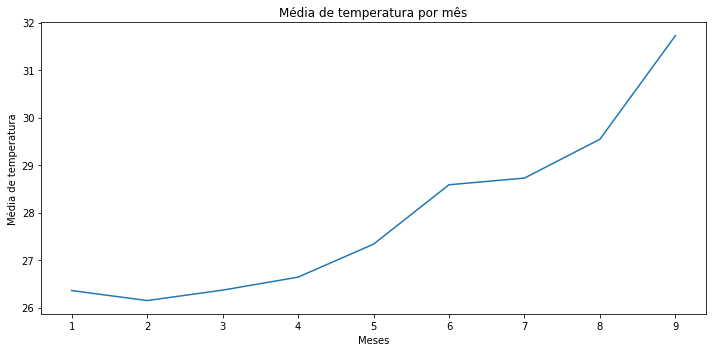

In [15]:
# Plota o gráfico de médias de temperaturas por mês
fig, ax = plt.subplots(figsize=(10, 5))
temperaturas_meses.plot(kind='line', ax=ax)
ax.set_title('Média de temperatura por mês')
ax.set_xlabel('Meses')
ax.set_ylabel('Média de temperatura')
plt.tight_layout()

## Análise das chuvas

### Qual foi o volume total de chuvas ?

In [19]:
# Retorna o valor máximo da variável RainYear no dia 31/12/2019.
print(f"O volume total das chuvas em 2021 foi: {df_clean.loc[df_clean.Data_add=='2021-09-23'].RainYear.max()}mm")

O volume total das chuvas em 2021 foi: 330.2mm


### Quais os meses mais chuvosos ?

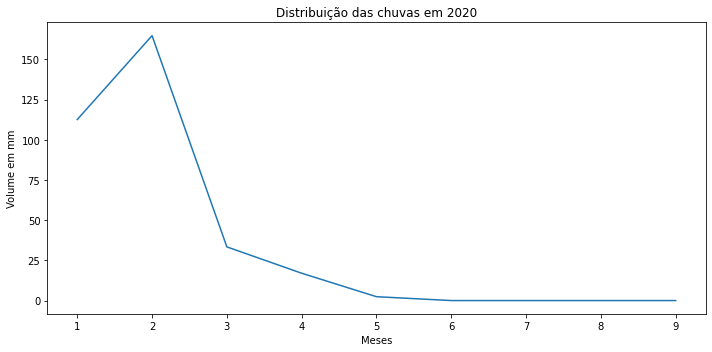

In [31]:
# Retorna os meses em ordem crescente e seus respectivos volumes de chuva
meses_e_chuvas = df_clean.groupby(by=[df_clean.index.month]).RainMonth.max().sort_index() 

#Plota gráfico de linha para chuvas
fig, ax = plt.subplots(figsize=(10,5))
meses_e_chuvas.plot(kind='line', ax=ax)
ax.set_title('Distribuição das chuvas em 2020')
ax.set_xlabel('Meses')
ax.set_ylabel('Volume em mm')
plt.tight_layout()

In [32]:
#Ordena os meses em ordem crescente de volume de chuva
meses_e_chuvas = meses_e_chuvas.sort_values(ascending=False)
display(meses_e_chuvas)


Datetime
2    164.8
1    112.6
3     33.4
4     17.0
5      2.4
9      0.0
8      0.0
7      0.0
6      0.0
Name: RainMonth, dtype: float64

A listagem acima exibe os meses e seus volumes de chuvas ordenados em ordem decrescente. Fevereiro foi o mês com maior volume de chuvas, com 164,8mm, seguido por janeiro, com 112,6mm e março com 33,4mm. 

Através do gráfico abaixo, pode-se visualizar a distribuição das chuvas durante o ano.

###Em quantos dias houve chuvas?

In [22]:
# Retorna uma lista com todos os dias onde a variável RainDay foi maior que 0
dias_chuvosos = (df_clean.loc[df_clean.RainDay > 0, ['Data_add']]).Data_add.unique()

# Quantidade de dias chuvosos
print(f'Em 2021 houve {len(dias_chuvosos)} dias com precipitações')

Em 2021 houve 55 dias com precipitações


### Qual o volume de chuva por dia ?


In [23]:
# Valume de chuva em cada um dos dias
(df_clean.loc[df_clean.RainDay > 0, ['Data_add', 'RainDay']]).groupby(['Data_add']).RainDay.max().sort_values(ascending=False)

Data_add
2021-02-18    45.8
2021-02-16    28.0
2021-01-13    27.6
2021-01-10    20.8
2021-01-12    20.2
2021-02-26    19.8
2021-02-17    16.0
2021-02-23    11.2
2021-01-29    10.4
2021-03-01    10.2
2021-01-16     8.6
2021-02-25     6.6
2021-04-23     6.4
2021-02-24     6.4
2021-02-15     6.2
2021-01-20     5.2
2021-02-08     5.0
2021-04-22     5.0
2021-01-05     4.8
2021-01-21     4.4
2021-03-28     4.2
2021-03-29     4.2
2021-02-10     4.0
2021-01-07     4.0
2021-01-14     3.8
2021-02-19     3.6
2021-04-25     3.6
2021-02-22     3.0
2021-03-30     2.4
2021-02-11     2.4
2021-02-14     2.0
2021-02-09     1.8
2021-05-14     1.6
2021-01-19     1.2
2021-04-05     1.0
2021-03-02     1.0
2021-02-20     1.0
2021-01-30     0.8
2021-05-15     0.8
2021-02-27     0.8
2021-02-01     0.2
2021-02-13     0.2
2021-01-24     0.2
2021-01-22     0.2
2021-03-03     0.2
2021-03-16     0.2
2021-03-26     0.2
2021-03-27     0.2
2021-03-31     0.2
2021-04-11     0.2
2021-04-13     0.2
2021-01-08     0.2
202

Conforme a lista acima o dia que houve o maior volume de chuva foi 18/02, com 45,8mm, seguido por 16/02, com 28mm 13/01 com 27,6mm. 


## Análise da umidade relativa do ar

A umidade relativa do ar consiste na quantidade de vapor de água existente na atmosfera. O que caracteriza se o ar está seco ou úmido.

O gráfico abaixo apresenta a média da umidade do ar por mês durante o ano de 2020.


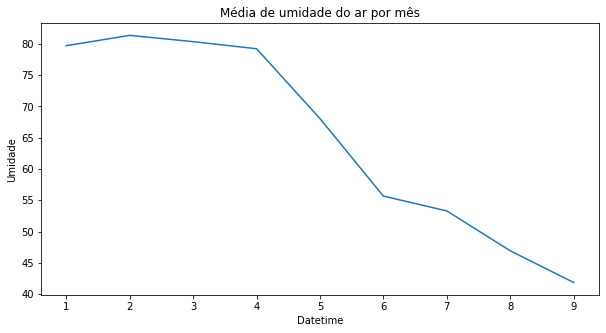

In [24]:
# Calcula a média da umidade por mês
media_umidade_mes = df_clean.HumOut.groupby(by=[df_clean.index.month]).mean()

# PLota o gráfico de média de umidade do ar por mês
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Média de umidade do ar por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Umidade')
media_umidade_mes.plot(kind='line', ax=ax);

### Quais as médias de umidade em cada mês ?

In [25]:
display(media_umidade_mes.sort_values(ascending=False))

Datetime
2    81.372183
3    80.363731
1    79.716273
4    79.235500
5    68.065160
6    55.671703
7    53.297147
8    46.929097
9    41.860982
Name: HumOut, dtype: float64

A listagem acima exibe os meses e suas respectivas médias de umidade relativa do ar em ordem decrescente. Como visto, fevereiro foi o mês com a maior média, com 81,3%, seguido por março, com 80,3% e janeiro com 79,7%. Setembro foi o mês com o ar mais seco, registrando uma média de 41,8% de umidade.  

### Quais os dias mais umido e o mais seco do ano ?

In [26]:
# Calcula a média da umidade por dia
medias_umidade_dias = df_clean.HumOut.groupby(by=[df_clean.Data_add]).mean()

# Retorna a data com maior média de umidade
display(medias_umidade_dias.sort_values(ascending=False)[:1])

# Retorna a data com a menor média de umidade
display(medias_umidade_dias.sort_values(ascending=False)[-1:])

Data_add
2021-04-19    92.978261
Name: HumOut, dtype: float64

Data_add
2021-09-11    36.708333
Name: HumOut, dtype: float64

Conforme visto acima, 19/04 foi o dia mais úmido do ano, com 92,9% de umidade média, enquanto 11/09 foi o dia mais seco, com 36,7% de umidade média. 

## Análise dos ventos

### Quando e qual foi a maior velocidade do vento ? 

In [27]:
# Retorna o maior valor de WindSpeed
df_clean.loc[df_clean.WindSpeed == df_clean.WindSpeed.max(), ['WindSpeed']]

,WindSpeed
Datetime,
2021-07-11 12:05:03.438869,20


A maior velocidade do vento foi 20km/h, registrada no dia 11/07 às 12h:05m.

### Qual direção do vento é predominante ?

In [28]:
# Vento predominante
df_clean.WindDir.describe()

count    12092.000000
mean       154.844195
std         88.870387
min          1.000000
25%         91.000000
50%        133.000000
75%        205.000000
max        360.000000
Name: WindDir, dtype: float64

Como visto acima, a direção o vento predominante é 205⁰. O gráfico abaixo mostra a frequência em relação a direção do vento.


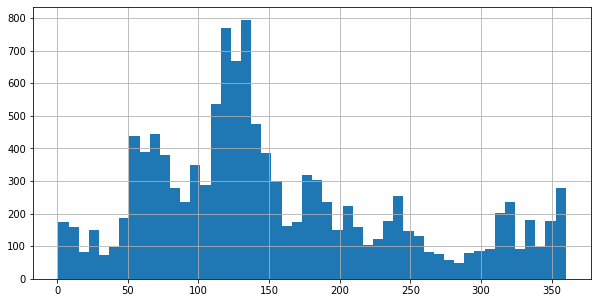

In [29]:
df_clean.WindDir.hist(figsize=(10, 5), bins=50, grid=True);

O gráfico abaixo exibe a distribuição da direção do vento e a velocidade.

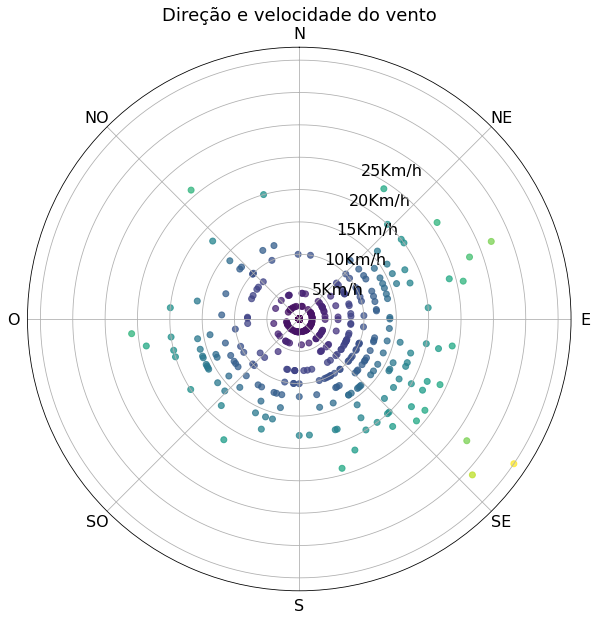

In [30]:
import numpy as np

direcao = df_clean.WindDir.sort_index()

velocidade = df_clean.WindSpeed.sort_index()

graus = direcao * np.pi / 180
cor = velocidade

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1, projection='polar')
ax.set_title('Direção e velocidade do vento', fontdict={'fontsize': '18', 'verticalalignment': 'center_baseline'})
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SO', 'O', 'NO'], fontdict={'fontsize': '16', 'verticalalignment': 'center_baseline', 'horizontalalignment': 'center'})
ax.set_xmargin(0.2)
ax.set_yticklabels(['5Km/h', '10Km/h', '15Km/h', '20Km/h', '25Km/h'], fontdict={'fontsize': '16', 'verticalalignment': 'center_baseline'} )
c = ax.scatter(graus, velocidade, c=cor, alpha=0.75)
